In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as iio
import scipy.ndimage as nd
from skimage.filters.thresholding import threshold_otsu, threshold_local
import cv2

2.1.1

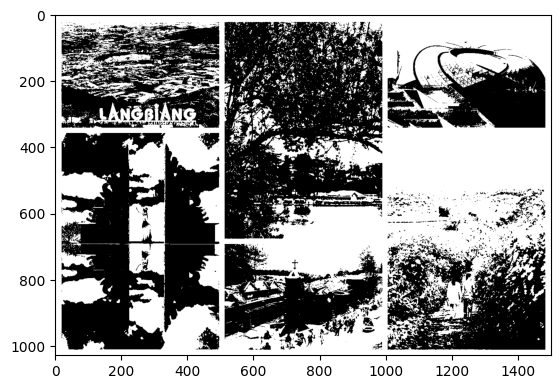

In [2]:
data = Image.open('exercise/dalat.jpg').convert('L')
a = np.array(data)
thres = threshold_otsu(a)
b = a > thres
b = Image.fromarray(b)
plt.imshow(b)
plt.show()

2.1.2

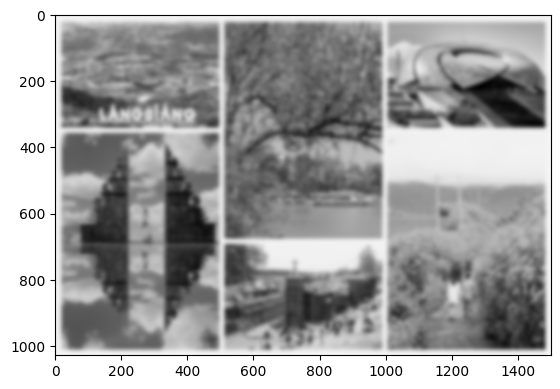

In [3]:
b = threshold_local(a, 39, offset=10)
b = Image.fromarray(b)
plt.imshow(b)


2.2

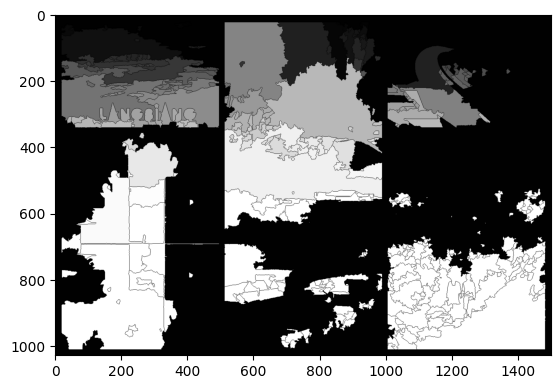

In [4]:
data = cv2.imread('exercise/dalat.jpg')
a = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
thres, b1 = cv2.threshold(a, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
b2 = cv2.erode(b1, None, iterations=2)
dist_trans = cv2.distanceTransform(b2, 2, 3)
thresh, dt = cv2.threshold(dist_trans, 1, 255, cv2.THRESH_BINARY)
labeled, ncc = nd.label(dt)
labeled = labeled.astype(np.int32)
cv2.watershed(data, labeled)
b = Image.fromarray(labeled)
plt.imshow(b)
plt.show()

2.3.1

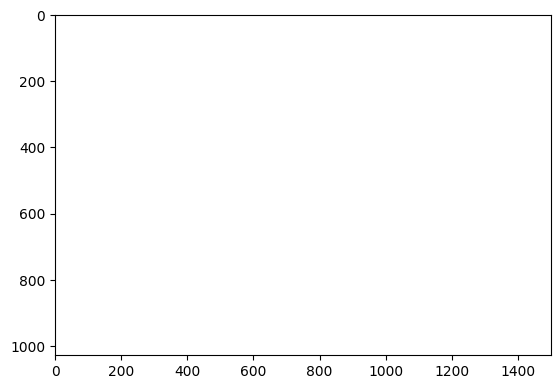

In [5]:
data = Image.open('exercise/dalat.jpg').convert('L')
b = nd.binary_dilation(data, iterations=50)
c = Image.fromarray(b)
c.show()
plt.imshow(c)   
plt.show()

2.3.2

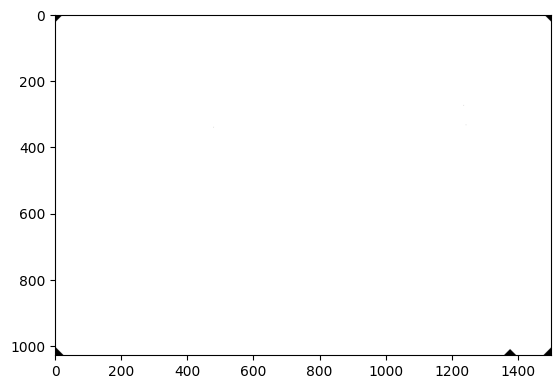

In [6]:
s = [[0,1,0], [1,1,1], [0,1,0]]
b = nd.binary_opening(data, structure=s, iterations=25)
c = Image.fromarray(b)
c.show()
plt.imshow(c)   
plt.show()

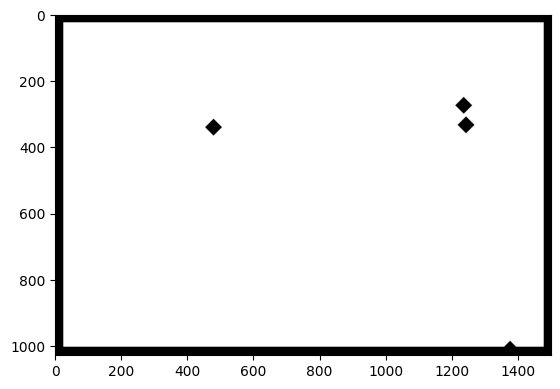

In [7]:
s = [[0,1,0], [1,1,1], [0,1,0]]
b = nd.binary_erosion(data, structure=s, iterations=25)
c = Image.fromarray(b)
c.show()
plt.imshow(c)   
plt.show()

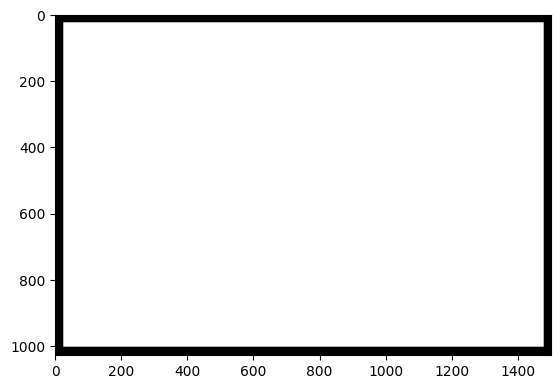

In [8]:
s = [[0,1,0], [1,1,1], [0,1,0]]
b = nd.binary_closing(data, structure=s, iterations=25)
c = Image.fromarray(b)
c.show()
plt.imshow(c)   
plt.show()

Bài tập 1

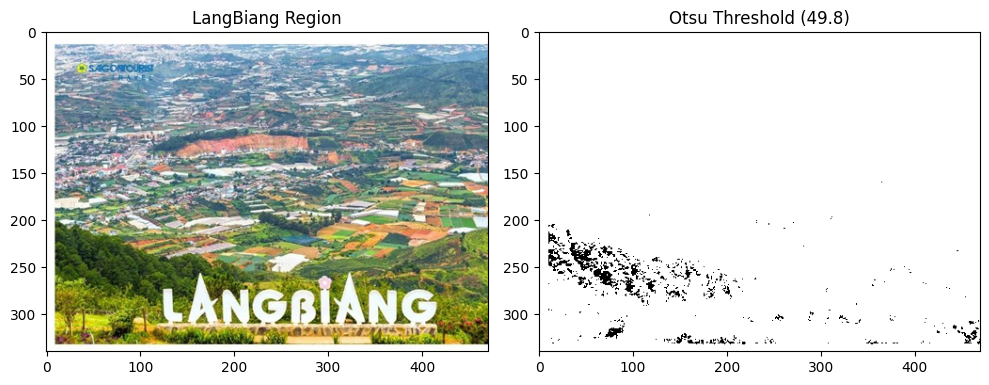

In [9]:
data = iio.imread('exercise/dalat.jpg')
LangBiang = data[10:350, 10:480]
Image.fromarray(LangBiang).save('LangBiang.jpg')

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(LangBiang)
plt.title('LangBiang Region')

data = Image.open('LangBiang.jpg').convert('L')
a = np.array(data)
thres = threshold_otsu(a) *0.3
b = a > thres
b = Image.fromarray(b)
Image.fromarray(LangBiang).save('lang_biang.jpg')

plt.subplot(1, 2, 2)
plt.imshow(b, cmap='gray')
plt.title(f'Otsu Threshold ({thres})')

plt.tight_layout()
plt.show()



Bai 2

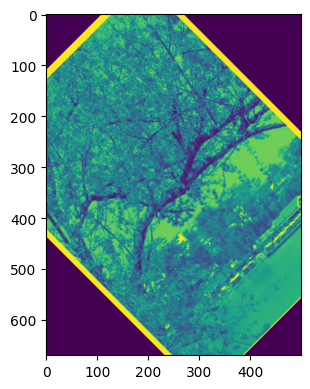

In [10]:
data = iio.imread('exercise/dalat.jpg', mode = 'L')
HoXuanHuong = data[10:680, 500:1000]
Image.fromarray(HoXuanHuong).save('HoXuanHuong.jpg')
shifted = nd.rotate(HoXuanHuong, 45, reshape=False)

data = Image.open('LangBiang.jpg').convert('L')
a=np.array(HoXuanHuong)
thres = threshold_local(a, offset=60)
b = a > thres
b = Image.fromarray(b)
Image.fromarray(HoXuanHuong).save('ho_xuan_huong.jpg')

plt.figure(figsize=(10, 4))
plt.imshow(shifted)
plt.tight_layout()
plt.show()


Bai 3

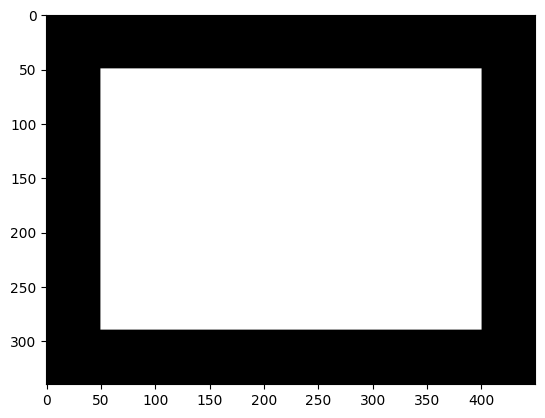

In [11]:
data = iio.imread('exercise/dalat.jpg')
LamVien = data[10:350, 1000:1450]
Image.fromarray(LamVien).save('LamVien.jpg')
img = iio.imread('LamVien.jpg', mode='L')
s = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]  # structuring element
b = nd.binary_closing(img, structure=s, iterations=50)
img = Image.fromarray(b)
img.save('quan_truong_lam_vien.jpg')  # Save separately
img.show()
plt.imshow(img, cmap='gray')
plt.show()

Bai 4

In [12]:
def tinhtien(image):
    data = iio.imread(image, mode='L')
    x = int(input("Nhap gia tri tinh tien x: "))
    y = int(input("Nhap gia tri tinh tien y: "))
    img = nd.shift(data, shift=(x, y))
    iio.imwrite("geometri.jpg", img)
    plt.imshow(img)
    plt.show()
    return img

In [13]:
def xoay(image):
    data = iio.imread(image, mode='L')
    angle = int(input("Nhap goc xoay: "))
    reshape = input("Nhap reshape (True/False): ").strip().lower()
    if reshape:
        img = nd.rotate(data, angle, reshape=True)
    else:   
        img = nd.rotate(data, angle, reshape=False)
    iio.imwrite("geometri.jpg", img)
    plt.imshow(img)
    plt.show()
    return img

In [14]:
def scale(image):
    data = iio.imread(image)
    zoom_factor = int(input("Nhap he so zoom: "))
    img = nd.zoom(data, zoom_factor)
    iio.imwrite("geometri.jpg", img)
    plt.imshow(img, cmap='gray')
    plt.show()
    return img

In [15]:
def cooridnate_map(image):
    img = iio.imread(image)
    dx, dy = 100,100
    grid_color = [0,0,0]
    img[:,::dy,:] = grid_color
    img[::dx,:,:] = grid_color
    iio.imwrite("geometri.jpg", img)
    plt.imshow(img)
    plt.show()
    return img
        

In [16]:
def geometric_transform(input1):
    if input1 == 1:
        tinhtien('exercise/dalat.jpg')
    elif input1 == 2:
        xoay('exercise/dalat.jpg')
    elif input1 == 3:
        scale('exercise/dalat.jpg')
    elif input1 == 4:
        cooridnate_map('exercise/dalat.jpg')
    elif input1 == 5:
        print("Exiting...")
        return None
    else:
        print("Lựa chọn không hợp lệ. Vui lòng thử lại.")
    

In [55]:
def addaptive_threshold(image):
    data = Image.open(image).convert('L')
    a = np.array(data)
    thres = threshold_otsu(a)
    b = a > thres
    img = Image.fromarray(b)
    plt.imshow(img, cmap='gray')
    plt.show()
    return img

In [49]:
def binary_dilation(image):
    s = [[0,1,0], [1,1,1], [0,1,0]]
    data = Image.open(image).convert('L')
    b = nd.binary_dilation(data, structure=s, iterations=50)
    img = Image.fromarray(b)
    img.show()
    plt.imshow(c)   
    plt.show()
    return c

In [50]:
def binary_erosion(image):
    data = Image.open(image).convert('L')
    b = nd.binary_erosion(data, structure=s, iterations=50)
    img = Image.fromarray(b)
    img.show()
    plt.imshow(c)   
    plt.show()
    return c

In [51]:
def otsu_threshold(image):
    data = Image.open(image).convert('L')
    data = np.array(data)
    thres = threshold_otsu(data)
    b = data > thres
    img = Image.fromarray(b)
    plt.imshow(img, cmap='gray')
    plt.show()
    return img

In [52]:
def segment(input2, image):
    
    if input2 == 1:
        return addaptive_threshold(image)
    elif input2 == 2:
        return binary_dilation(image)
    elif input2 == 3:
        return binary_erosion(image)
    elif input2 == 4:
        return binary_erosion(image)
    else:
        print("Lựa chọn không hợp lệ. Vui lòng thử lại.")

In [63]:
def main():
    a = int(input("Nhập số phép biển đổi mà bạn muốn chọn (1 - 2): "))
    
    if a == 1:
        print("1. Geometric Transformations:")
        print("2. Segmentations:")
        b = int(input("Nhập lựa chọn của bạn (1 - 2): "))
        
        if b == 1:
            print("Geometric Transformations:")
            print("1. Translation")
            print("2. Rotation")
            print("3. Zoom")
            print("4. Coordinate Map")
            print("5. Exit")
            input1 = int(input("Nhập lựa chọn của bạn (1-5): "))
            geometric_transform(input1)
        
        elif b == 2:
            print("Image Segmentation:")
            print("1. Addaptive Threshold")
            print("2. Binary Dilation")
            print("3. Binary Erosion")
            print("4. Otsu Threshold")
            input2 = int(input("Nhập lựa chọn của bạn (1-4): "))
            segment(input2, "exercise/dalat.jpg")
        
        else:
            print("Lựa chọn không hợp lệ. Vui lòng thử lại.")
    
    elif a == 2:
        print("Geometric Transformations:")
        print("1. Translation")
        print("2. Rotation")
        print("3. Zoom")
        print("4. Coordinate Map")
        print("5. Exit")
        input1 = int(input("Nhập lựa chọn của bạn (1-5): "))
        geometric_transform(input1)
        
        print("Đã áp dụng Geometric Transformations")
        
        print("Image Segmentation:")
        print("1. Addaptive Threshold")
        print("2. Binary Dilation")
        print("3. Binary Erosion")
        print("4. Otsu Threshold")
        input2 = int(input("Nhập lựa chọn của bạn (1-4): "))
        segment(input2, "geometri.jpg")

In [ ]:
main()

1. Geometric Transformations:
2. Segmentations:
Geometric Transformations:
1. Translation
2. Rotation
3. Zoom
4. Coordinate Map
5. Exit
